# Data Science Project - Basketball Players Analysis

# WARNING: REMOVE ANY CODE TO VIEW THE RAW DATA BEFORE TURNING IN

# WARNING: Do not re-run this Jupyter Notebook. The data is confidential and not included in this submission.

## Background and Motivation

- One of the popular sports in the U.S. is basketball. One of the most important days in any sport is game day. Prathusha did an internship with the basketball team and this idea fascinated the others. Because of the interest in basketball and the importance of game day, we are trying to predict the performance on game day based on various factors taken into consideration for our home team.
- There are variety of factors taken into consideration for the analysis and prediction. For example, players’ performance leading up to game day, injuries, and the influence of a player on the overall team performance


## Project Objectives

- Prediction of the performance of individual players as game day arrives is based on various deciding factors like injury, player involvement, and other measures of performance for each practice. Game day is quite stressful, but also an important day to perform well. Without adding more pressure on the team to perform well on game day, our analytics will help the home team to win the match based on their performance on each day.
- We will use the factors injury, duration of each player’s practice, and the performance of each of the players as game day approaches, to do supervised and unsupervised analysis. Various factors will be used in these analyses to get maximum achieved performance on game day.
- Implementing strategic analysis methods will increase the probability of the team winning games in the future as well as reduce injuries.


##  Input data

In [1]:
# imports and setup 

import pandas as pd
import numpy as np
import statsmodels.formula.api as sm

from sklearn.cluster import KMeans, AgglomerativeClustering

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

import nltk
from nltk.corpus import stopwords

import re

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

In [2]:
analysis_data = pd.read_csv("CS Project Player Data.csv")

In [3]:
game_data = pd.read_csv("CS Project Game Logs.csv", header=1)

In [4]:
# Here we remove any empty columns
game_data = game_data.dropna(axis=1, how='all')

## Exploring the Data

In [5]:
analysis_data.describe()

,InjuryStatus,InjuryType,ActivityType,rpe,dur,minply,trimp,TPR
count,5666.000000,5666.000000,5665.000000,5554.000000,5681.000000,1295.000000,5593.000000,58.000000
mean,0.207201,0.171550,0.883495,2.331847,94.457281,10.820783,307.903487,50.973099
std,0.650988,0.594065,0.675581,1.998314,67.055216,12.345886,300.389405,30.243924
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.304551
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.737168
50%,0.000000,0.000000,1.000000,3.000000,119.000000,3.000000,300.000000,52.041566
75%,0.000000,0.000000,1.000000,4.000000,150.000000,21.838889,500.000000,76.506879
max,6.000000,6.000000,3.000000,10.000000,214.000000,47.000000,1712.000000,99.917358


In [6]:
analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 13 columns):
PlayerID            5700 non-null object
date                5700 non-null object
InjuryStatus        5666 non-null float64
InjuryType          5666 non-null float64
ActivityType        5665 non-null float64
rpe                 5554 non-null float64
dur                 5681 non-null float64
minply              1295 non-null float64
trimp               5593 non-null float64
Location            3781 non-null object
Opponent            895 non-null object
Date_Act_Loc_Opp    5700 non-null object
TPR                 58 non-null float64
dtypes: float64(8), object(5)
memory usage: 579.0+ KB


In [7]:
num_ath = len(analysis_data.PlayerID.unique())
print("There are " + str(num_ath) + " athletes on the Basketball team.")

There are 25 athletes on the Basketball team.


In [8]:
game_data.describe()

,UTAH_POINTS,OPPONENT_POINTS,UTAH_FG,UTAH_FGA,UTAH_FG%,UTAH_3P,UTAH_3PA,UTAH_3P%,UTAH_FT,UTAH_FTA,...,OPPONENT_FT,OPPONENT_FTA,OPPONENT_FT%,OPPONENT_ORB,OPPONENT_TRB,OPPONENT_AST,OPPONENT_STL,OPPONENT_BLK,OPPONENT_TOV,OPPONENT_PF
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,76.064516,68.419355,27.161290,56.370968,0.482306,7.887097,21.887097,0.358500,13.854839,19.258065,...,12.387097,17.693548,0.699355,8.080645,30.032258,11.387097,6.225806,3.145161,11.790323,19.370968
std,10.423603,12.144686,4.620672,6.648638,0.060615,3.003303,5.018343,0.105145,5.878125,7.531215,...,4.836185,6.053284,0.107163,3.053074,5.034203,3.939522,2.977618,2.118202,3.383359,4.304911
min,55.000000,37.000000,18.000000,41.000000,0.350000,2.000000,12.000000,0.100000,2.000000,4.000000,...,4.000000,6.000000,0.467000,1.000000,20.000000,2.000000,0.000000,0.000000,5.000000,8.000000
25%,67.000000,60.000000,24.000000,53.250000,0.441000,6.000000,19.000000,0.286000,9.000000,13.000000,...,9.000000,13.000000,0.637750,6.000000,27.000000,9.000000,4.000000,1.250000,10.000000,17.000000
50%,76.500000,68.500000,26.000000,56.000000,0.484500,8.000000,21.500000,0.372500,13.500000,19.000000,...,12.000000,17.500000,0.714000,7.500000,30.000000,11.000000,6.000000,3.000000,12.000000,19.000000
75%,84.750000,78.000000,30.000000,61.000000,0.519000,10.000000,25.500000,0.438000,18.000000,23.750000,...,15.000000,21.750000,0.783000,11.000000,32.750000,14.000000,8.000000,4.750000,14.000000,22.000000
max,96.000000,94.000000,39.000000,71.000000,0.600000,15.000000,36.000000,0.583000,29.000000,36.000000,...,30.000000,36.000000,0.909000,15.000000,44.000000,19.000000,14.000000,10.000000,22.000000,31.000000


In [9]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 38 columns):
Date               62 non-null object
H/A/N              62 non-null object
Opponent           62 non-null object
W/L                62 non-null object
UTAH_POINTS        62 non-null float64
OPPONENT_POINTS    62 non-null float64
UTAH_FG            62 non-null float64
UTAH_FGA           62 non-null float64
UTAH_FG%           62 non-null float64
UTAH_3P            62 non-null float64
UTAH_3PA           62 non-null float64
UTAH_3P%           62 non-null float64
UTAH_FT            62 non-null float64
UTAH_FTA           62 non-null float64
UTAH_FT%           62 non-null float64
UTAH_ORB           62 non-null float64
UTAH_TRB           62 non-null float64
UTAH_AST           62 non-null float64
UTAH_STL           62 non-null float64
UTAH_BLK           62 non-null float64
UTAH_TOV           62 non-null float64
UTAH_PF            62 non-null float64
OPPONENT_FG        62 non-null float64
OP

In [10]:
sm.ols(formula="trimp ~ InjuryStatus", data=analysis_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  trimp   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     175.6
Date:                Thu, 29 Mar 2018   Prob (F-statistic):           1.72e-39
Time:                        15:47:05   Log-Likelihood:                -39525.
No. Observations:                5559   AIC:                         7.905e+04
Df Residuals:                    5557   BIC:                         7.907e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      324.6200      4.173     77.789      0.000     316.439     332.801
InjuryStatus   -80.4361      6.069    -13.253      0.000     -92.334     -68.538
==============================================================================
Omnibus:                      446.725   Durbin-Watson:                   1.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              559.811
Skew:                           0.770   Prob(JB):                    2.74e-122
Kurtosis:                       3.206   Cond. No.                         1.64
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Data Visualization

### Data Exploration Of Practices VS Game VS Off Days

In [11]:
#Group the data by date and Activity Type, find the size of each ActivityType in each day
date_activity = analysis_data.groupby(['date','ActivityType']).size()
#make a datframe for grouped data
activity_frame = pd.DataFrame(date_activity.reset_index())
activity_frame.columns = ['date','ActivityType','sum']
#Convert date into date format and sort it
activity_frame['date'] = pd.to_datetime(activity_frame.date)
activity_frame.sort_values(['date']).reset_index(drop= True)

,date,ActivityType,sum
0,2016-10-01,0.0,1
1,2016-10-01,1.0,14
2,2016-10-02,0.0,15
3,2016-10-03,1.0,16
4,2016-10-04,1.0,16
5,2016-10-05,0.0,16
6,2016-10-06,1.0,16
7,2016-10-07,1.0,16
8,2016-10-08,1.0,16
9,2016-10-09,0.0,16


In [12]:
#Due to the large number of data, we group the date by month.
activity_frame['year'] = [y.year for y in activity_frame['date']]
activity_frame['month'] = [m.month for m in activity_frame['date']]

In [13]:
#Group off days data by year and month
off = activity_frame.loc[activity_frame['ActivityType'] == 0.0]
off.sort_values(['date']).reset_index(drop=True)
off = off.groupby(['year','month'])['sum'].sum().reset_index(drop=True)
off = pd.DataFrame(off)

#Group practice days data by year and month
practice = activity_frame.loc[activity_frame['ActivityType'] == 1.0]
practice.sort_values(['date']).reset_index(drop=True)
practice = practice.groupby(['year','month'])['sum'].sum().reset_index(drop=True)
practice = pd.DataFrame(practice)

#Group game days data by year and month
game = activity_frame.loc[activity_frame['ActivityType'] == 2.0]
game.sort_values(['date']).reset_index(drop=True)
game = game.groupby(['year','month'])['sum'].sum().reset_index(drop=True)
game = pd.DataFrame(game)

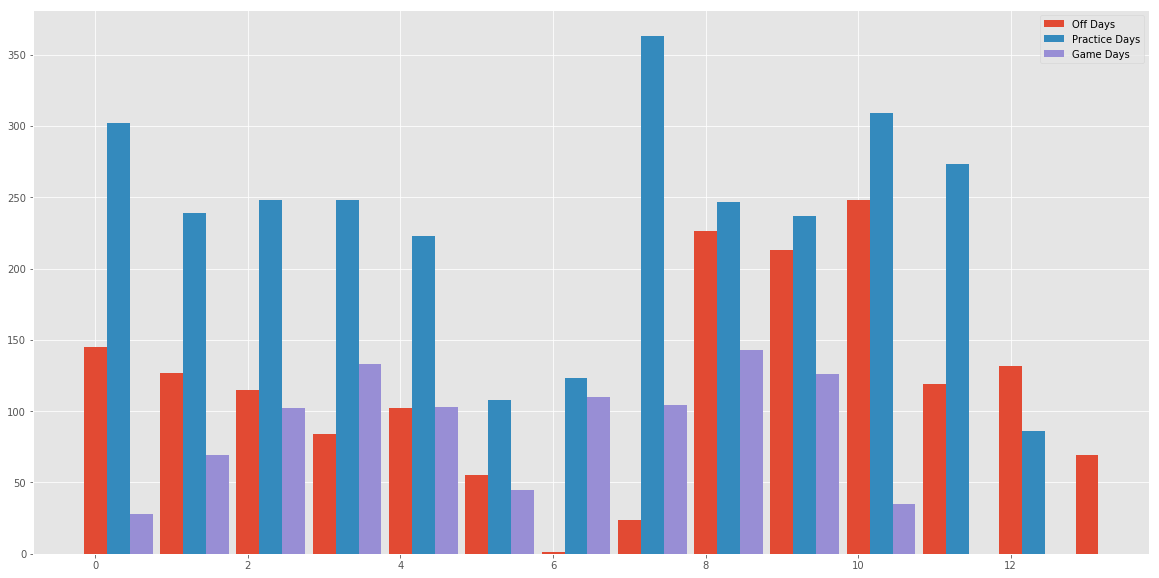

In [14]:
#Make bar plot for each type of activity
plt.figure(figsize=(20,10))
plt.bar(off.index, off['sum'], width = 0.3,label='Off Days')
plt.bar(practice.index + 0.3, practice['sum'],  width = 0.3,label='Practice Days')
plt.bar(game.index + 0.6, game['sum'],  width = 0.3,label='Game Days')
plt.legend()

### Visualization of individual players data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023C975ACCC0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000023C99802D30>]], dtype=object)

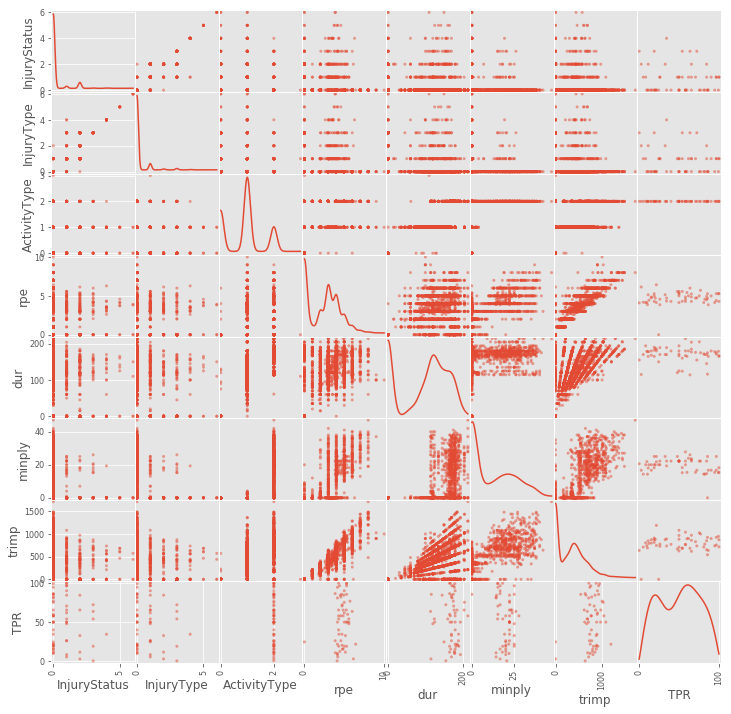

In [15]:
pd.plotting.scatter_matrix(analysis_data, figsize=(12, 12), diagonal='kde')

Here we can see that as an injury stays over time and as the injury type gets more serious, the performance (measured by trimp) of the players goes down. However, when there are no injuries, the performance of a player varies and cannot be easily predicted with simply injury data.

### Influence of injury on team performance

In [16]:
team_data = analysis_data[analysis_data.iloc[:, 0] == "TEAM"]

In [17]:
player_data = analysis_data[analysis_data.iloc[:, 0] != "TEAM"]

Text(0,0.5,'Trimp')

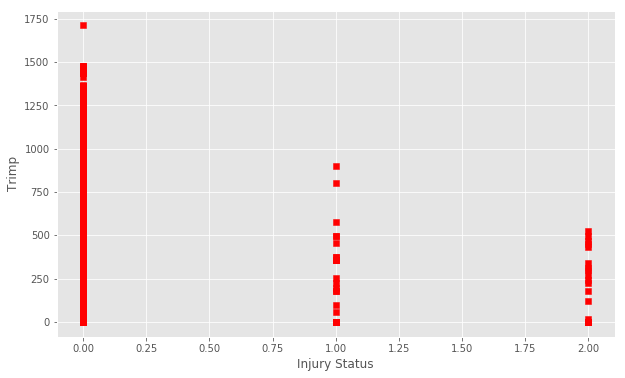

In [18]:
plt.scatter(x=player_data['InjuryStatus'],y=player_data['trimp'],c='r',marker='s')

plt.xlabel('Injury Status')
plt.ylabel('Trimp')

Text(0,0.5,'Trimp')

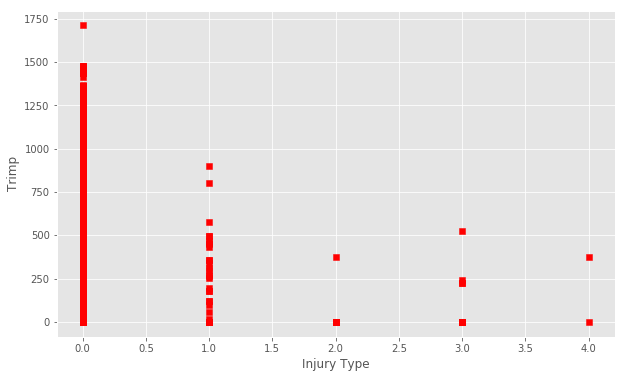

In [19]:
plt.scatter(x=player_data['InjuryType'],y=player_data['trimp'],c='r',marker='s')

plt.xlabel('Injury Type')
plt.ylabel('Trimp')

Text(0,0.5,'Trimp')

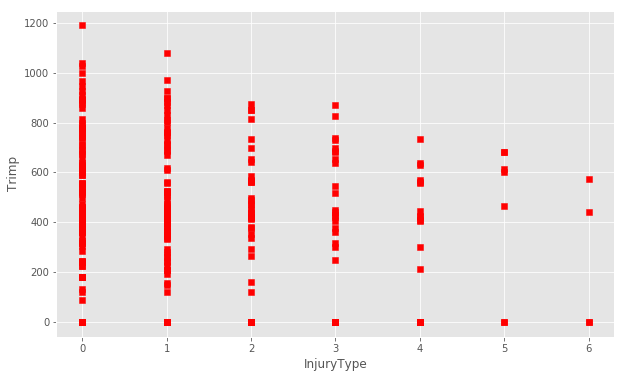

In [20]:
plt.scatter(x=team_data['InjuryType'],y=team_data['trimp'],c='r',marker='s')

plt.xlabel('InjuryType')
plt.ylabel('Trimp')

### Prediction of performance on game day

In [21]:
team_game_data = team_data[team_data.loc[:, "ActivityType"] == 2]

In [22]:
team_game_data.corr()

,InjuryStatus,InjuryType,ActivityType,rpe,dur,minply,trimp,TPR
InjuryStatus,1.000000,0.986437,NaN,0.099876,-0.264160,-0.088512,-0.154925,-0.084130
InjuryType,0.986437,1.000000,NaN,0.007485,-0.292507,-0.098747,-0.233655,-0.108769
ActivityType,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rpe,0.099876,0.007485,NaN,1.000000,-0.115627,0.187698,0.535579,0.145926
dur,-0.264160,-0.292507,NaN,-0.115627,1.000000,0.192339,0.602358,-0.040042
minply,-0.088512,-0.098747,NaN,0.187698,0.192339,1.000000,0.259664,-0.191937
trimp,-0.154925,-0.233655,NaN,0.535579,0.602358,0.259664,1.000000,0.186496
TPR,-0.084130,-0.108769,NaN,0.145926,-0.040042,-0.191937,0.186496,1.000000


In [23]:
sm.ols(formula="trimp ~ rpe + dur", data=team_game_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  trimp   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     84.20
Date:                Thu, 29 Mar 2018   Prob (F-statistic):           2.84e-18
Time:                        15:47:15   Log-Likelihood:                -383.04
No. Observations:                  64   AIC:                             772.1
Df Residuals:                      61   BIC:                             778.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -895.5821    130.285     -6.874      0.000   -1156.104    -635.060
rpe          138.9142     15.052      9.229      0.000     108.815     169.013
dur            6.0282      0.595     10.129      0.000       4.838       7.218
==============================================================================
Omnibus:                      108.851   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2965.795
Skew:                          -5.328   Prob(JB):                         0.00
Kurtosis:                      34.601   Cond. No.                     1.81e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We get that rpe and duration are good estimations of performance on game day. It makes sense that rpe is a good predictor because that is how well the players think they performed.

We do not get a model that promises accurate prediction for every game day, but we can predict 73% of the games correctly with this model.

#### Relation between performace of each player and exertion rate

Text(0,0.5,'Trimp')

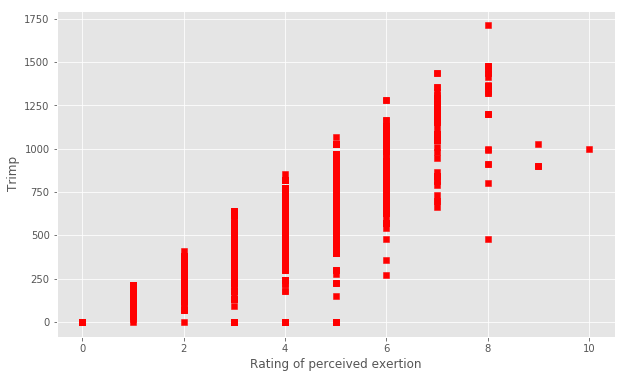

In [24]:
plt.scatter(x=player_data['rpe'],y=player_data['trimp'],c='r',marker='s')

plt.xlabel('Rating of perceived exertion')
plt.ylabel('Trimp')

In [25]:
team_data

,PlayerID,date,InjuryStatus,InjuryType,ActivityType,rpe,dur,minply,trimp,Location,Opponent,Date_Act_Loc_Opp,TPR
13,TEAM,10/01/16,0.0,0.0,1.0,3.538462,180.000000,0.000000,636.923077,NaN,NaN,Oct 01_Practice,NaN
28,TEAM,10/02/16,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,Oct 02_Off,NaN
43,TEAM,10/03/16,0.0,0.0,1.0,3.800000,205.000000,0.000000,779.000000,NaN,NaN,Oct 03_Practice,NaN
59,TEAM,10/04/16,0.0,0.0,1.0,3.400000,180.000000,0.000000,612.000000,NaN,NaN,Oct 04_Practice,NaN
75,TEAM,10/05/16,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,Oct 05_Off,NaN
91,TEAM,10/06/16,0.0,0.0,1.0,3.333333,180.000000,0.000000,600.000000,NaN,NaN,Oct 06_Practice,NaN
107,TEAM,10/07/16,0.0,0.0,1.0,3.785714,160.000000,0.000000,605.714286,NaN,NaN,Oct 07_Practice,NaN
123,TEAM,10/08/16,0.0,0.0,1.0,2.000000,60.000000,0.000000,120.000000,NaN,NaN,Oct 08_Practice,NaN
139,TEAM,10/09/16,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,Oct 09_Off,NaN
155,TEAM,10/10/16,0.0,0.0,1.0,3.800000,180.000000,0.000000,684.000000,NaN,NaN,Oct 10_Practice,NaN


In [26]:
game_data['Date']

0      11/12/2016
1      11/15/2016
2      11/18/2016
3      11/25/2016
4      11/28/2016
5       12/1/2016
6       12/6/2016
7      12/10/2016
8      12/17/2016
9      12/22/2016
10     12/23/2016
11     12/25/2016
12       1/1/2017
13       1/5/2017
14       1/7/2017
15      1/12/2017
16      1/14/2017
17      1/18/2017
18      1/21/2017
19      1/26/2017
20      1/28/2017
21       2/2/2017
22       2/4/2017
23       2/9/2017
24      2/11/2017
25      2/16/2017
26      2/19/2017
27      2/23/2017
28       3/2/2017
29       3/4/2017
          ...    
968           NaN
969           NaN
970           NaN
971           NaN
972           NaN
973           NaN
974           NaN
975           NaN
976           NaN
977           NaN
978           NaN
979           NaN
980           NaN
981           NaN
982           NaN
983           NaN
984           NaN
985           NaN
986           NaN
987           NaN
988           NaN
989           NaN
990           NaN
991           NaN
992       

#### Influence of activity type on performance of the team

Text(0,0.5,'Trimp')

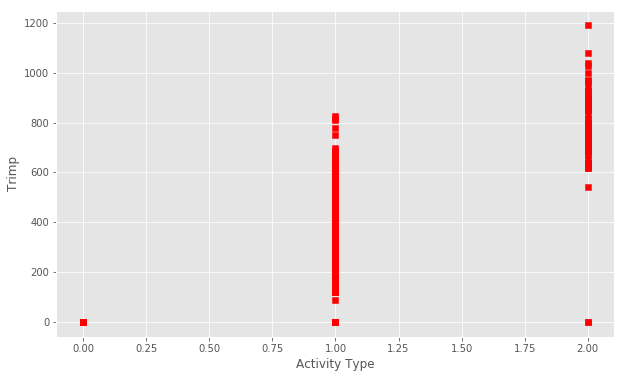

In [27]:
plt.scatter(x=team_data['ActivityType'],y=team_data['trimp'],c='r',marker='s')

plt.xlabel('Activity Type')
plt.ylabel('Trimp')

In [43]:
print(team_data['date']='2013-16-11')

SyntaxError: keyword can't be an expression (<ipython-input-43-1fc9550b1395>, line 1)

#### Infuence of rating of perceived exertion on the performance on team on the game day

Text(0,0.5,'Trimp')

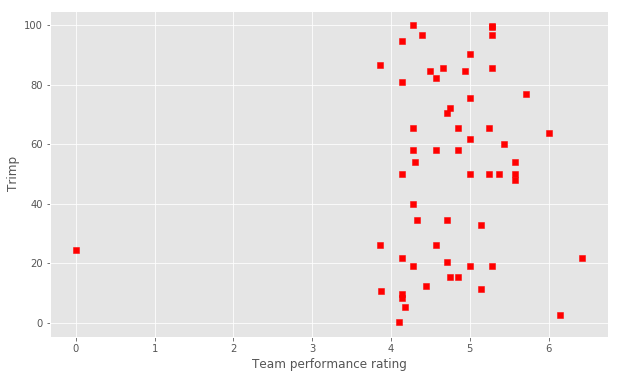

In [29]:
plt.scatter(x=team_data['rpe'],y=team_data['TPR'],c='r',marker='s')

plt.xlabel('Team performance rating')
plt.ylabel('Trimp')

From above plot it is clear that the rate of exertion is scaterred around 3(moderate practise) to 5(hard practise) has more infuence on performance of team than very hard(7) and maximal(10) exertions. Since team composed on all others, the overall practise exertion is counted rather tahn individual players.

In [30]:
sm.ols(formula="trimp ~ ActivityType + InjuryStatus + InjuryType + rpe + dur ", data=team_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  trimp   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     482.7
Date:                Thu, 29 Mar 2018   Prob (F-statistic):          2.67e-148
Time:                        15:48:08   Log-Likelihood:                -2008.9
No. Observations:                 332   AIC:                             4030.
Df Residuals:                     326   BIC:                             4053.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -64.1808     12.293     -5.221      0.000     -88.364     -39.998
ActivityType    50.1970     20.166      2.489      0.013      10.525      89.869
InjuryStatus   104.3393     24.741      4.217      0.000      55.667     153.011
InjuryType    -102.6354     24.758     -4.145      0.000    -151.342     -53.929
rpe             72.0322      7.417      9.712      0.000      57.442      86.623
dur              1.9320      0.223      8.660      0.000       1.493       2.371
==============================================================================
Omnibus:                      118.516   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              852.306
Skew:                          -1.284   Prob(JB):                    8.39e-186
Kurtosis:                      10.417   Cond. No.                         745.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
team_data["date"] = pd.to_datetime(team_data["date"])

C:\Users\Prathusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Visualization of Game log data:

In [32]:
game_data.dtypes

Date                object
H/A/N               object
Opponent            object
W/L                 object
UTAH_POINTS        float64
OPPONENT_POINTS    float64
UTAH_FG            float64
UTAH_FGA           float64
UTAH_FG%           float64
UTAH_3P            float64
UTAH_3PA           float64
UTAH_3P%           float64
UTAH_FT            float64
UTAH_FTA           float64
UTAH_FT%           float64
UTAH_ORB           float64
UTAH_TRB           float64
UTAH_AST           float64
UTAH_STL           float64
UTAH_BLK           float64
UTAH_TOV           float64
UTAH_PF            float64
OPPONENT_FG        float64
OPPONENT_FGA       float64
OPPONENT_FG%       float64
OPPONENT_3P        float64
OPPONENT_3PA       float64
OPPONENT_3P%       float64
OPPONENT_FT        float64
OPPONENT_FTA       float64
OPPONENT_FT%       float64
OPPONENT_ORB       float64
OPPONENT_TRB       float64
OPPONENT_AST       float64
OPPONENT_STL       float64
OPPONENT_BLK       float64
OPPONENT_TOV       float64
O

In [33]:
game_data["Date"] = pd.to_datetime(game_data["Date"])

In [34]:
game_data.corr()

,UTAH_POINTS,OPPONENT_POINTS,UTAH_FG,UTAH_FGA,UTAH_FG%,UTAH_3P,UTAH_3PA,UTAH_3P%,UTAH_FT,UTAH_FTA,...,OPPONENT_FT,OPPONENT_FTA,OPPONENT_FT%,OPPONENT_ORB,OPPONENT_TRB,OPPONENT_AST,OPPONENT_STL,OPPONENT_BLK,OPPONENT_TOV,OPPONENT_PF
UTAH_POINTS,1.000000,-0.087370,0.778880,0.387588,0.667541,0.418644,0.103248,0.520005,0.334867,0.361056,...,-0.007983,0.100347,-0.210460,0.146130,-0.161555,-0.102818,-0.049598,-0.068739,0.056171,0.258844
OPPONENT_POINTS,-0.087370,1.000000,-0.043876,0.042707,-0.083977,-0.073739,-0.108686,-0.004878,-0.048276,-0.091895,...,0.320684,0.213398,0.313428,0.115794,0.223936,0.683548,0.187284,0.153724,-0.171375,-0.054762
UTAH_FG,0.778880,-0.043876,1.000000,0.662378,0.695290,0.139548,-0.133527,0.358076,-0.262280,-0.183526,...,-0.170102,-0.063261,-0.228920,0.008359,-0.157386,0.021730,-0.084904,0.027717,-0.120489,-0.228872
UTAH_FGA,0.387588,0.042707,0.662378,1.000000,-0.071636,0.045644,0.139341,-0.052048,-0.377379,-0.348000,...,-0.239066,-0.153544,-0.178759,-0.038648,0.225428,0.095821,-0.015894,0.304586,-0.097784,-0.383482
UTAH_FG%,0.667541,-0.083977,0.695290,-0.071636,1.000000,0.140585,-0.309231,0.515715,0.018807,0.100914,...,0.038791,0.087473,-0.091642,0.045485,-0.417517,-0.055632,-0.095942,-0.237966,-0.039330,0.077522
UTAH_3P,0.418644,-0.073739,0.139548,0.045644,0.140585,1.000000,0.721376,0.733674,0.012057,-0.038554,...,-0.033059,-0.042513,0.003896,0.353218,0.167223,-0.026728,0.039561,-0.036036,0.008925,-0.075321
UTAH_3PA,0.103248,-0.108686,-0.133527,0.139341,-0.309231,0.721376,1.000000,0.077625,0.024444,-0.086835,...,-0.060989,-0.137691,0.167948,0.375094,0.379754,-0.084821,0.135579,-0.111014,0.098997,-0.105784
UTAH_3P%,0.520005,-0.004878,0.358076,-0.052048,0.515715,0.733674,0.077625,1.000000,-0.015689,0.021199,...,0.019762,0.092892,-0.172847,0.164310,-0.114189,0.000435,-0.104776,0.058407,-0.126151,-0.002083
UTAH_FT,0.334867,-0.048276,-0.262280,-0.377379,0.018807,0.012057,0.024444,-0.015689,1.000000,0.948485,...,0.270161,0.299121,-0.015298,0.065519,-0.124487,-0.202832,0.025319,-0.147059,0.284475,0.857311
UTAH_FTA,0.361056,-0.091895,-0.183526,-0.348000,0.100914,-0.038554,-0.086835,0.021199,0.948485,1.000000,...,0.238012,0.307060,-0.088433,0.008349,-0.174043,-0.233278,0.042683,-0.100012,0.223476,0.881868


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023C99C84EF0>,
        ...,
        ...,
        ...,
       ..., 
        ...,
        ...,
        ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000023CB15C3B38>]], dtype=object)

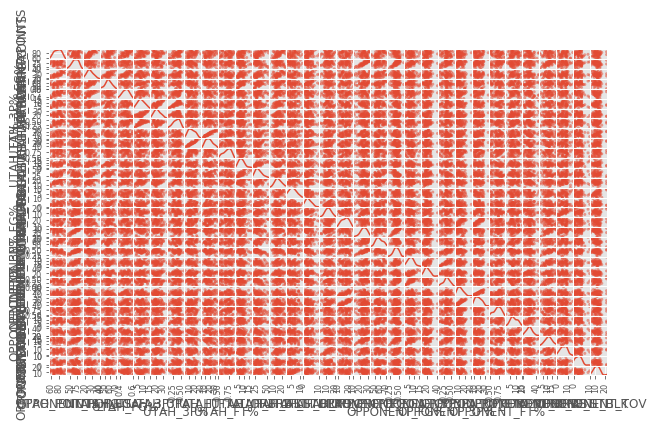

In [35]:
pd.plotting.scatter_matrix(game_data.iloc[:, 4:37], diagonal='kde')

# --End of synced parts--

In [36]:
plt.scatter(x=game_data.loc[:,'Opponent'],y=game_data.loc[:,'Win_Or_Lose'],c='r',marker='s')

plt.xlabel('Win/Lose')
plt.ylabel('Opponent')

KeyError: 'the label [Win_Or_Lose] is not in the [columns]'

In [37]:
Opponent_grp = game_data.groupby(game_data['Opponent'])
Opponent_grp.plot(x="Opponent", y=["Win_Or_Lose"])

KeyError: "['Win_Or_Lose'] not in index"

In [38]:
fig, ax = plt.subplots()
air.groupby(['POC']).plot(x="Date", y="Daily Mean PM2.5 Concentration",ax=ax,
                          
Opponent_grp = game_data.groupby(game_data['Opponent'])
Opponent_grp.plot(x="Opponent", y=["Win_Or_Lose"])

SyntaxError: invalid syntax (<ipython-input-38-6263dffba153>, line 5)

### Combining the dataframes to get overall performance and influence on various factors

In [57]:
# Here we have to rename the date column so that we can merge it with the Date column in the other dataframe
analysis_data.rename(index=str, columns={"date": "Date"}, inplace=True)
analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5700 entries, 0 to 5699
Data columns (total 13 columns):
PlayerID            5700 non-null object
Date                5700 non-null object
InjuryStatus        5666 non-null float64
InjuryType          5666 non-null float64
ActivityType        5665 non-null float64
rpe                 5554 non-null float64
dur                 5681 non-null float64
minply              1295 non-null float64
trimp               5593 non-null float64
Location            3781 non-null object
Opponent            895 non-null object
Date_Act_Loc_Opp    5700 non-null object
TPR                 58 non-null float64
dtypes: float64(8), object(5)
memory usage: 623.4+ KB


In [58]:
Complete_data = game_data[['Date', 'H/A/N','Opponent','W/L','UTAH_POINTS','OPPONENT_POINTS']].merge(analysis_data[['Date','PlayerID','InjuryStatus','ActivityType','rpe','dur','trimp','TPR']], on='Date', how='left')

In [59]:
Complete_data.describe()

,UTAH_POINTS,OPPONENT_POINTS,InjuryStatus,ActivityType,rpe,dur,trimp,TPR
count,62.000000,62.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,76.064516,68.419355,NaN,NaN,NaN,NaN,NaN,NaN
std,10.423603,12.144686,NaN,NaN,NaN,NaN,NaN,NaN
min,55.000000,37.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,67.000000,60.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,76.500000,68.500000,NaN,NaN,NaN,NaN,NaN,NaN
75%,84.750000,78.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,96.000000,94.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
Complete_data.dtypes

Date                object
H/A/N               object
Opponent            object
W/L                 object
UTAH_POINTS        float64
OPPONENT_POINTS    float64
PlayerID            object
InjuryStatus       float64
ActivityType       float64
rpe                float64
dur                float64
trimp              float64
TPR                float64
dtype: object

In [62]:
Complete_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 997
Data columns (total 13 columns):
Date               62 non-null object
H/A/N              62 non-null object
Opponent           62 non-null object
W/L                62 non-null object
UTAH_POINTS        62 non-null float64
OPPONENT_POINTS    62 non-null float64
PlayerID           0 non-null object
InjuryStatus       0 non-null float64
ActivityType       0 non-null float64
rpe                0 non-null float64
dur                0 non-null float64
trimp              0 non-null float64
TPR                0 non-null float64
dtypes: float64(8), object(5)
memory usage: 109.2+ KB


#### Getting team data from complete dataframe

In [55]:
Complete_team_data = Complete_data[Complete_data.iloc[:, 6] == "TEAM"]

#### Factors influencing the team overall performance

ValueError: zero-size array to reduction operation minimum which has no identity

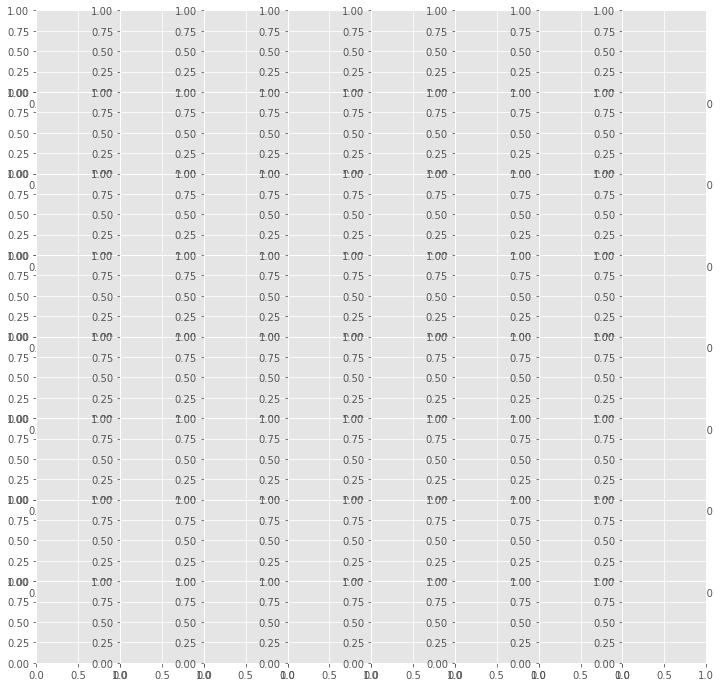

In [50]:
pd.plotting.scatter_matrix(Complete_data, figsize=(12, 12), diagonal='kde')

In [ ]:
Complete_data.corr()

In [ ]:
plt.scatter(x=Complete_team_data.loc[:,'trimp'],y=Complete_team_data.loc[:,'TPR'],c='r',marker='s')

plt.xlabel('trimp')
plt.ylabel('TPR')

Trimp is the training impulse. Thus from the graph above, it is obvious that when the trimp is distributed between 700 to 1000.  The overall team performance on game day is higher than practice days or off days. Hence, it influences performance more.